In [2]:
#import the necessary packages
import pandas as pd
import numpy as np
import requests
import re
import bleach
from time import sleep
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
!ls

Untitled.ipynb
archive (2).zip
top50.csv


In [7]:
top_df = pd.read_csv('top50.csv')
data_df = pd.read_csv('data.csv.zip')

In [11]:
data_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [14]:
print(data_df)

         Position                  Track Name              Artist  Streams  \
0               1  Reggaetón Lento (Bailemos)                CNCO    19272   
1               2                    Chantaje             Shakira    19270   
2               3   Otra Vez (feat. J Balvin)       Zion & Lennox    15761   
3               4                Vente Pa' Ca        Ricky Martin    14954   
4               5                      Safari            J Balvin    14269   
...           ...                         ...                 ...      ...   
3441192       196          More Than You Know  Axwell /\ Ingrosso     2126   
3441193       197                      Issues      Julia Michaels     2117   
3441194       198                 Tuo Fei Lun          Eason Chan     2112   
3441195       199                          面具          Alfred Hui     2102   
3441196       200                  Let Her Go           Passenger     2088   

                                                       URL     

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   URL         object
 5   Date        object
 6   Region      object
dtypes: int64(2), object(5)
memory usage: 183.8+ MB


array([[<AxesSubplot:title={'center':'Position'}>,
        <AxesSubplot:title={'center':'Streams'}>]], dtype=object)

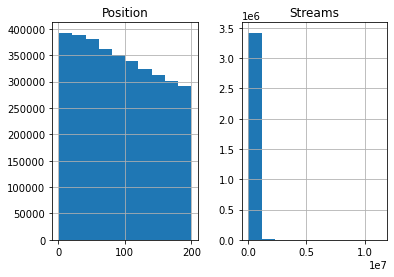

In [21]:
data_df.hist()

In [10]:
top_df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [13]:
print(top_df)

    Unnamed: 0                                         Track.Name  \
0            1                                           Se�orita   
1            2                                              China   
2            3                      boyfriend (with Social House)   
3            4                    Beautiful People (feat. Khalid)   
4            5                        Goodbyes (Feat. Young Thug)   
5            6                  I Don't Care (with Justin Bieber)   
6            7                                             Ransom   
7            8                                  How Do You Sleep?   
8            9                              Old Town Road - Remix   
9           10                                            bad guy   
10          11                                           Callaita   
11          12              Loco Contigo (feat. J. Balvin & Tyga)   
12          13                                  Someone You Loved   
13          14                    

In [16]:
top_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Beats.Per.Minute'}>,
        <AxesSubplot:title={'center':'Energy'}>],
       [<AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness..dB..'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Valence.'}>,
        <AxesSubplot:title={'center':'Length.'}>,
        <AxesSubplot:title={'center':'Acousticness..'}>],
       [<AxesSubplot:title={'center':'Speechiness.'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

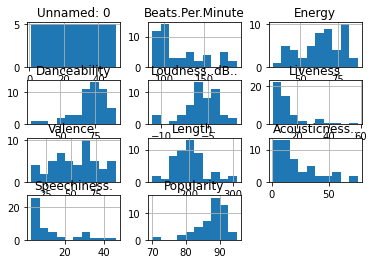

In [22]:
top_df.hist()